**Polytropic equation:**  
$ P = K \rho^{1 + \frac{1}{n}} $

Ideal gas relation:  
$ P = \frac{k_B \rho T}{\mu} $

$$
K \rho^{1 + \frac{1}{n}} = \frac{k_B \rho T}{\mu} \quad \Rightarrow \quad T = \frac{\mu}{k_B K} \rho^{\frac{1}{n}}
$$

Since $ \rho = \rho_c \Theta^n $,

$$
T = \frac{\mu}{k_B K} \rho_c^{1/n} \Theta = T_c \Theta
$$

Let us compute $ T $ and $ \rho $ profiles using Lane-Emden solutions for $ n = 3 $, with

- $ T = (15.7 \times 10^6 \, \text{K}) \, \Theta $
- $ \rho = (15.8 \, \text{g/cm}^3) \, \Theta^3 $


In [2]:
import math
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import scipy.integrate as spi

# Define the Lane-Emden equation for n = 3
def lane_emden(y, r):
    return [y[1], -y[0]**3 - 2*y[1]/r]

# Initial conditions: θ(0) = 1, θ'(0) = 0
y0 = [1.0, 0.0]
r = np.linspace(1e-15, 10, 1000)
sol = odeint(lane_emden, y0, r)
y = sol[:, 0]

# Central values
T0 = 15.7e6  # K
Rho0 = 158   # g/cm^3

# Physical profiles
temperature = T0 * y
density = Rho0 * y**3
r_normalized = r / np.max(r)

In [3]:
# Define density and temperature profiles as functions of r/R
def temp(r_over_R):
    xi = r_over_R * xi_1
    phi_vals = phi_interp(xi)
    temp_vals = np.zeros_like(phi_vals)
    valid = phi_vals > 0
    temp_vals[valid] = T_0 * phi_vals[valid]
    return temp_vals

def rho(r_over_R):
    xi = r_over_R * xi_1
    phi_vals = phi_interp(xi)
    rho_vals = np.zeros_like(phi_vals)
    valid = phi_vals > 0
    rho_vals[valid] = rho_0 * phi_vals[valid]**3
    return rho_vals

We now compute the total nuclear energy generation in the star:

$$
L = \int_V E(\rho, T) \, dV = 4\pi \int_0^R r^2 E(\rho, T) \, dr
$$

Using Lane-Emden coordinates $ \xi $:

$$
L = 4\pi \alpha^3 \int_0^{\xi_1} \xi^2 E(\rho(\xi), T(\xi)) \, d\xi
$$

With the energy generation formula:

$$
E(\rho, T) = 2.46 \times 10^6 \, \rho^2 \, X^2 \, T^{-2/3} \, e^{-33.81 \, T^{-1/3}}
$$

Let us implement this in code and compute the total luminosity.


In [5]:
# Define integrand
def f(r):
    y_val = np.interp(r, r_normalized, y)
    if y_val <= 0:
        return 0.0  # Skip non-physical or undefined values
    return (r**2) * (y_val**(16/3)) * math.exp(-13.5 * y_val**(-1/3))


# Integrate
a = 0
b = np.max(r)
result, error = spi.quad(f, a, b, epsabs=1.5e-8, epsrel=1.5e-8)
print("The result of the integration is:", result)
print("The estimated error is:", error)


The result of the integration is: 3.17521200479217e-10
The estimated error is: 6.035035124883859e-10


Below are the plots of temperature and density profiles across the radius of the star:

- Linear and logarithmic plots of temperature $ T(r) $
- Linear and logarithmic plots of density $ \rho(r) $

These visualize how stellar structure behaves under a polytropic assumption.


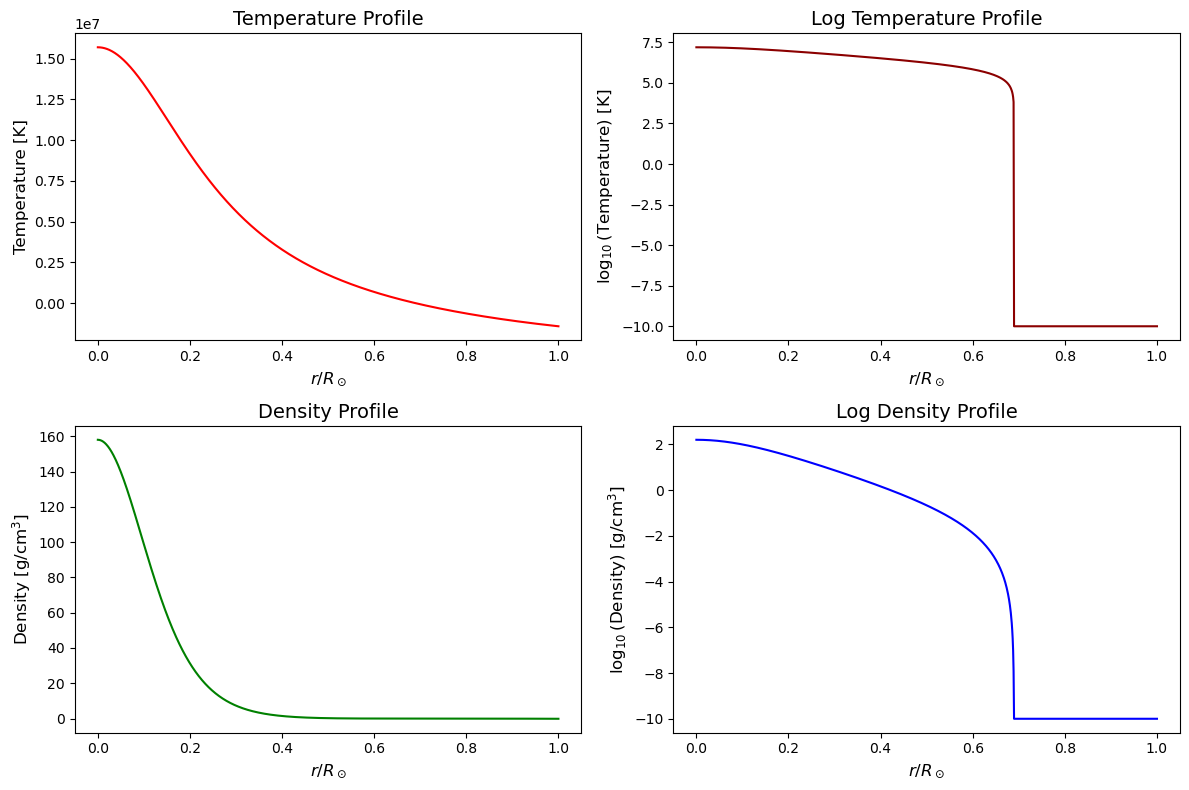

In [7]:
# Compute safe values for log plotting
temperature_safe = np.clip(temperature, 1e-10, None)
density_safe = np.clip(density, 1e-10, None)

# Plotting all in one figure with enhanced style
plt.figure(figsize=(12, 8))

# Subplot 1: Temperature
plt.subplot(2, 2, 1)
plt.plot(r_normalized, temperature, color='red')
plt.xlabel(r'$r / R_\odot$', fontsize=12)
plt.ylabel(r'Temperature [K]', fontsize=12)
plt.title('Temperature Profile', fontsize=14)

# Subplot 2: Log Temperature
plt.subplot(2, 2, 2)
plt.plot(r_normalized, np.log10(temperature_safe), color='darkred')
plt.xlabel(r'$r / R_\odot$', fontsize=12)
plt.ylabel(r'$\log_{10}$(Temperature) [K]', fontsize=12)
plt.title('Log Temperature Profile', fontsize=14)

# Subplot 3: Density
plt.subplot(2, 2, 3)
plt.plot(r_normalized, density, color='green')
plt.xlabel(r'$r / R_\odot$', fontsize=12)
plt.ylabel(r'Density [g/cm$^3$]', fontsize=12)
plt.title('Density Profile', fontsize=14)

# Subplot 4: Log Density
plt.subplot(2, 2, 4)
plt.plot(r_normalized, np.log10(density_safe), color='blue')
plt.xlabel(r'$r / R_\odot$', fontsize=12)
plt.ylabel(r'$\log_{10}$(Density) [g/cm$^3$]', fontsize=12)
plt.title('Log Density Profile', fontsize=14)

plt.tight_layout()
plt.show()